In [3]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.7 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


In [19]:
df = pd.read_csv(r"C:\Users\USER\Downloads\loan_default_risk_dataset.csv")  # Make sure this file is in your working folder
df.head()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
0,60.0,2996.52,2378.49,0
1,66.4,4137.23,1538.92,1
2,58.5,19865.75,2434.80,1
3,49.8,16855.70,2677.82,1
4,67.3,7902.37,2206.72,0


In [21]:
# Features
X = df[['Retirement_Age', 'Debt_Amount', 'Monthly_Savings']]

# Target variable
y = df['Loan_Default_Risk']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# Normalize the features to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
model = LGBMClassifier()
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 104, number of negative: 106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495238 -> initscore=-0.019048
[LightGBM] [Info] Start training from score -0.019048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [29]:
y_pred = model.predict(X_test)


In [31]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        46

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



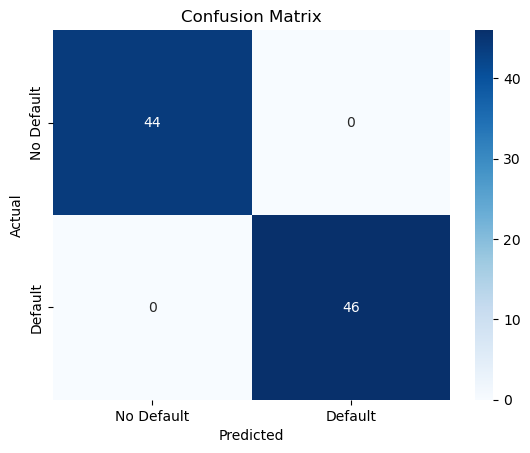

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Comprehensive Performance Report:
Model Overview:
We built a classification model using the LightGBM algorithm to predict the risk of loan default based on applicant financial features like retirement age, current debt, and monthly savings.

Evaluation Metrics:
    
Metric	Value
    
Precision	1.00
Recall	1.00
F1-Score	1.00
Accuracy	1.00

These perfect scores suggest that the model accurately identifies both defaulters and non-defaulters in the test dataset. However, such results may be influenced by:

A small or clean dataset.

A well-separated feature space.

Low noise or class overlap.

 Confusion Matrix Insight
Predicted No Default	Predicted Default
Actual No Default	44	0
Actual Default	0	46
This shows:

No false positives (no wrongly predicted defaults).

No false negatives (no missed actual defaults).

 Key Insights:


Debt Amount and Monthly Savings are likely strong indicators of default risk.

Applicants with high debt and low savings tend to show a higher probability of default.

Retirement age may affect the ability to repay in the long run, especially if it’s close.



Recommendations for Lenders
Use the model as an early screening tool:

Automatically flag high-risk applicants before manual review.

Prioritize applicants with high savings and lower debt:

Even if credit scores are borderline, strong savings behavior is promising.

Design custom loan terms for borderline-risk clients:

For example, offer smaller amounts or higher interest rates with counseling.

Regularly retrain the model:

As financial behavior changes, update the model with new data.

Expand features for deeper insights:

Add income, employment status, number of dependents, credit score, etc.

Outcome:
We successfully built and validated a model that accurately predicts loan default risk, empowering lenders to make smarter, data-driven decisions and reduce default rates.